In [15]:
#importar las librerias

# Importar la librería pandas para manipulación de datos
import pandas as pd

# Importar la librería os para funciones relacionadas con el sistema operativo
import os

# Importar la librería matplotlib.pyplot para visualización de datos mediante gráficos
import matplotlib.pyplot as plt

# Importar la librería datetime para manipulación de objetos de fecha y hora
import datetime as dt

In [16]:
os.listdir('ventas')

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [17]:
#leactura de csv de pandas
df=pd.DataFrame()
df

""


In [18]:
df =  pd.read_csv('ventas/Sales_June_2019.csv')
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"


In [19]:
files = os.listdir('ventas')
for x in files:
    file = pd.read_csv('ventas/'+x)
    df=pd.concat([file,df])

In [20]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [21]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200472 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          199884 non-null  object
 1   Product           199884 non-null  object
 2   Quantity Ordered  199884 non-null  object
 3   Price Each        199884 non-null  object
 4   Order Date        199884 non-null  object
 5   Purchase Address  199884 non-null  object
dtypes: object(6)
memory usage: 10.7+ MB


In [23]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [24]:
#conteo de valores nulos
df.isnull().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               199884
True      True     True              True        True        True                   588
dtype: int64

In [25]:
df=df[df['Order ID'].notnull()]

In [26]:
df.isnull().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               199884
dtype: int64

In [27]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"


In [28]:
Product = (df['Product'] == "Product").sum()
print(Product)

378


In [29]:
# elimina todas las filas en las que el valor en la columna 'Product' es igual a 'Product'
df=df[df['Product']!='Product']

In [30]:
Product = (df['Product'] == "Product").sum()
print(Product)

0


In [31]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int64')
df['Price Each']=df['Price Each'].astype('float')
df['Order Date']=pd.to_datetime(df['Order Date'])

'''
1 bit: Puede representar dos valores distintos (0 o 1).
2 bits: Puede representar cuatro valores distintos (00, 01, 10, 11).
8 bits: Es conocido como un "byte" y puede representar 256 valores distintos (2^8).
16 bits: Puede representar 65,536 valores distintos (2^16).
32 bits: Puede representar 4,294,967,296 valores distintos (2^32).
64 bits: Puede representar 18,446,744,073,709,551,616 valores distintos (2^64).
'''

'\n1 bit: Puede representar dos valores distintos (0 o 1).\n2 bits: Puede representar cuatro valores distintos (00, 01, 10, 11).\n8 bits: Es conocido como un "byte" y puede representar 256 valores distintos (2^8).\n16 bits: Puede representar 65,536 valores distintos (2^16).\n32 bits: Puede representar 4,294,967,296 valores distintos (2^32).\n64 bits: Puede representar 18,446,744,073,709,551,616 valores distintos (2^64).\n'

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199506 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          199506 non-null  object        
 1   Product           199506 non-null  object        
 2   Quantity Ordered  199506 non-null  int64         
 3   Price Each        199506 non-null  float64       
 4   Order Date        199506 non-null  datetime64[ns]
 5   Purchase Address  199506 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 10.7+ MB


In [33]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

# CUAL FUE EL MES CON LA VENTA MAS ALTA

In [34]:
#día
# df['Dia'] = df['Order Date'].dt.day

#año
# df['Año'] = df['Order Date'].dt.year

#extraer el mes
df['Mes'] = df['Order Date'].dt.month\

#realizar la multiplicacion de precio por cantidad
df['Total_Ventas'] = df['Quantity Ordered']*df['Price Each']

df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95


In [35]:
#agrupaciones primero por mes
df_mes=df.groupby('Mes').sum()

#resetear el indice
df_mes=df_mes.reset_index()

df_mes

C:\Users\luisi\AppData\Local\Temp\ipykernel_6256\534936900.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mes=df.groupby('Mes').sum()


,Mes,Quantity Ordered,Price Each,Total_Ventas
0,1,10903,1811768.38,1822256.73
1,2,13449,2188884.72,2202022.42
2,3,17005,2791207.83,2807100.38
3,4,20558,3367671.02,3390670.24
4,5,18667,3135125.13,3152606.75
5,6,30487,5121523.70,5153067.18
6,7,16093,2635538.05,2650804.14
7,8,13448,2230345.42,2244467.88
8,9,13109,2084992.09,2097560.13
9,10,22703,3715554.83,3736726.88


In [36]:
sales = df_mes.sort_values(by="Total_Ventas", ascending=False)
sales

,Mes,Quantity Ordered,Price Each,Total_Ventas
5,6,30487,5121523.70,5153067.18
11,12,28114,4588415.41,4613443.34
9,10,22703,3715554.83,3736726.88
3,4,20558,3367671.02,3390670.24
10,11,19798,3180600.68,3199603.20
4,5,18667,3135125.13,3152606.75
2,3,17005,2791207.83,2807100.38
6,7,16093,2635538.05,2650804.14
7,8,13448,2230345.42,2244467.88
1,2,13449,2188884.72,2202022.42


C:\Users\luisi\AppData\Local\Temp\ipykernel_6256\3604116261.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_fecha = df.groupby('Order Date').sum()


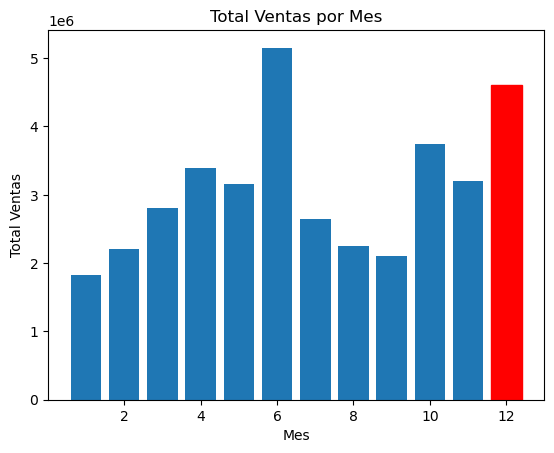

In [37]:
# Subplots de gráficos
# Agrupación por fecha
df_fecha = df.groupby('Order Date').sum()

# Crear la gráfica de barras
g1 = plt.bar(df_mes['Mes'], df_mes['Total_Ventas'])

# Personalizar la gráfica
plt.xlabel('Mes')
plt.ylabel('Total Ventas')
plt.title('Total Ventas por Mes')

g1[11].set_color('r')

# Mostrar la gráfica
plt.show()

# CUAL ES LA CIUDAD CON MAYOR VENTA

In [38]:
df['Ciudad']=df['Purchase Address'].apply(lambda x: x.split(',')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


In [45]:
#grafica para ver la ciudad
df_ciudad=df.groupby('Ciudad').sum()

df_ciudad=df_ciudad.reset_index()

df_ciudad

C:\Users\luisi\AppData\Local\Temp\ipykernel_6256\2457266652.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ciudad=df.groupby('Ciudad').sum()


,Ciudad,Quantity Ordered,Price Each,Mes,Total_Ventas,Hora
0,Atlanta,17828,2998351.82,111418,3014894.09,230106
1,Austin,11957,1952968.63,74120,1963552.95,152109
2,Boston,24144,3890263.47,149466,3916501.88,308721
3,Dallas,17921,2940480.98,111020,2956873.10,229516
4,Los Angeles,35739,5869498.12,221532,5902824.95,459550
5,New York City,29933,4957556.42,186400,4988192.03,382971
6,Portland,15134,2476596.95,93418,2490069.85,193430
7,San Francisco,53927,8819590.52,335350,8875811.42,690760
8,Seattle,17751,2946320.35,111277,2961609.00,228520


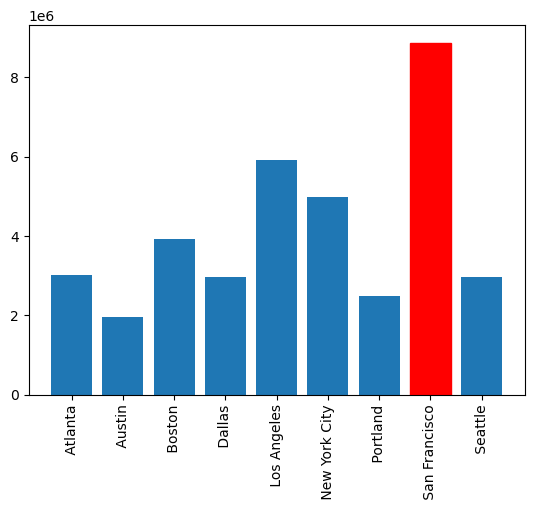

In [46]:
bars=plt.bar(df_ciudad['Ciudad'], df_ciudad['Total_Ventas'])
plt.xticks(rotation=90)
bars[7].set_color('r')
plt.show()

# CUAL ES LA HORA A QUE MAS SE VENDEN PRODUCTOS

In [41]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


In [42]:
df['Hora']=df['Order Date'].apply(lambda x: x.hour)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad,Hora
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19


In [43]:
#agrupacion por las horas 
df_hour=df.groupby('Hora').sum()
df_hour=df_hour.reset_index()

df.head()

C:\Users\luisi\AppData\Local\Temp\ipykernel_6256\3466925164.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hour=df.groupby('Hora').sum()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad,Hora
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19


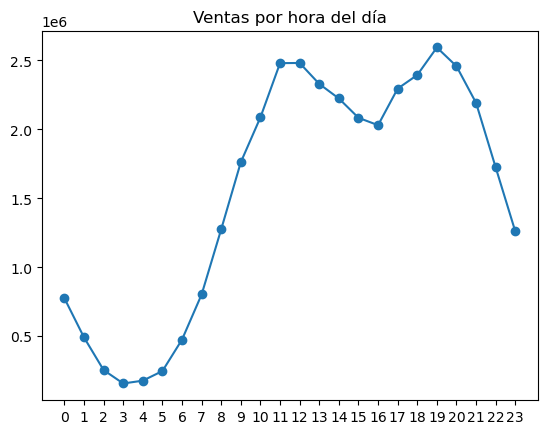

In [30]:
#grafica de lineas
plt.plot(df_hour['Total_Ventas'], marker='o')
plt.xticks(df_hour['Hora'])
plt.title('Ventas por hora del día')

plt.show()